In [54]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from keras.layers import Dense, Dropout, Flatten
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline

In [55]:
# Image size (width, height, dimensionality = 3)
target_size = (224,224)

# Total classes for classification in the dataset
total_classes = 17

# Batch size
batch_size = 16

# Dataset directory
path_to_dataset = "../dataset"

In [56]:
data_generator=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.20)

In [57]:
train_generator = data_generator.flow_from_directory(
    path_to_dataset,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

valid_generator = data_generator.flow_from_directory(
    path_to_dataset,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3539 images belonging to 17 classes.
Found 876 images belonging to 17 classes.


In [58]:
conv_base_res_net_50 = ResNet50(
    include_top=False,
    pooling="avg",
    weights="imagenet"
)

In [59]:
x = conv_base_res_net_50.output
x = Dense(256, activation="relu", kernel_regularizer="l2")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu", kernel_regularizer="l2")(x)
x = Dropout(0.25)(x)
x = Dense(128, activation="relu", kernel_regularizer="l2")(x)
x = Dropout(0.5)(x)
x = Dense(total_classes, activation="softmax")(x)
model = Model(inputs=conv_base_res_net_50.input, outputs=x)

# Set the first layer as non-trainable
model.layers[0].trainable = False

In [66]:
model.count_params()

24213137

In [60]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [61]:
# Reduce teh learning rate
learning_rate_reduction = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=0.00000001
)

In [62]:
checkpoint_filepath = "./"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True
)

In [63]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=valid_generator,
    validation_steps=len(valid_generator),
    callbacks=[learning_rate_reduction, model_checkpoint_callback]
)

Epoch 1/30
222/222 [==============================] - 447s 2s/step - loss: 6.0258 - accuracy: 0.1800 - val_loss: 12.5344 - val_accuracy: 0.1530 - lr: 0.0010
Epoch 2/30
222/222 [==============================] - 399s 2s/step - loss: 2.8704 - accuracy: 0.2930 - val_loss: 3.7487 - val_accuracy: 0.2409 - lr: 0.0010
Epoch 3/30
222/222 [==============================] - 382s 2s/step - loss: 2.1451 - accuracy: 0.3719 - val_loss: 1.9971 - val_accuracy: 0.3470 - lr: 0.0010
Epoch 4/30
222/222 [==============================] - 393s 2s/step - loss: 1.8667 - accuracy: 0.4083 - val_loss: 6.4508 - val_accuracy: 0.1895 - lr: 0.0010
Epoch 5/30
222/222 [==============================] - 383s 2s/step - loss: 1.6449 - accuracy: 0.4866 - val_loss: 1.6524 - val_accuracy: 0.4749 - lr: 0.0010
Epoch 6/30
222/222 [==============================] - 387s 2s/step - loss: 1.5027 - accuracy: 0.5369 - val_loss: 2.3925 - val_accuracy: 0.3607 - lr: 0.0010
Epoch 7/30
222/222 [==============================] - 393s 2s/s

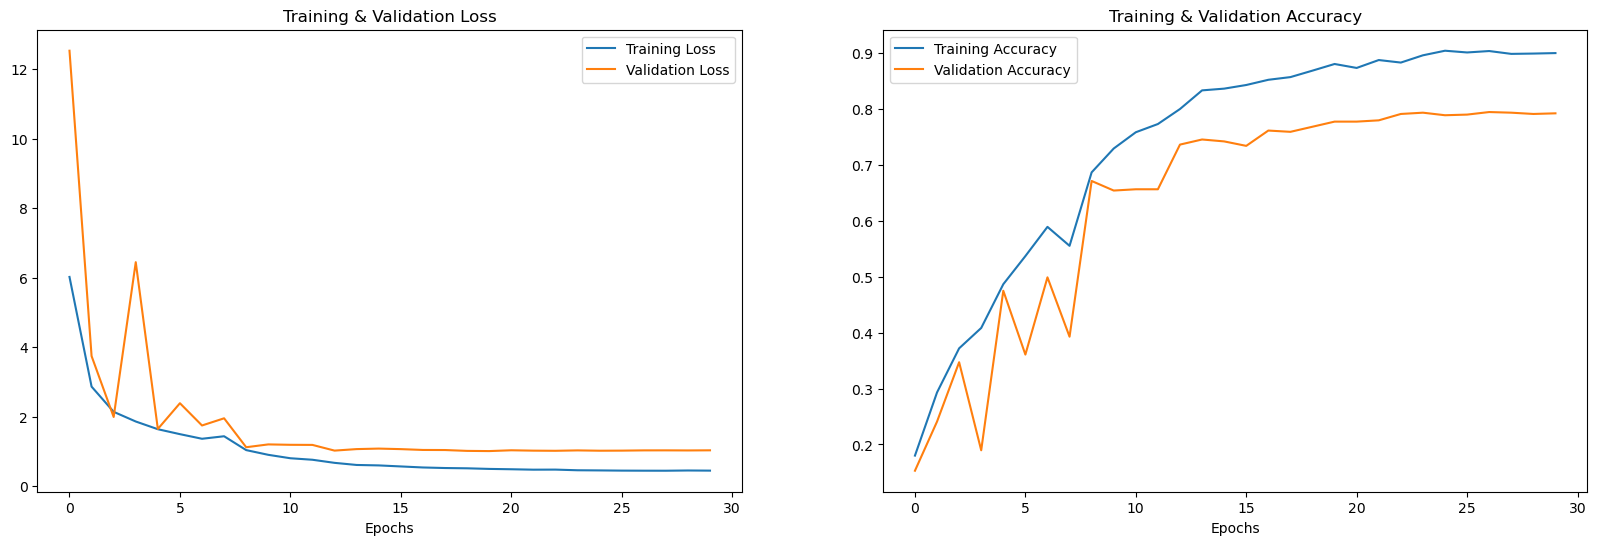

In [65]:
epochs = [i for i in range(30)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()